In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.plotting.register_matplotlib_converters() # Volvemos a registrar los convertores.
plt.rcParams['figure.figsize'] = [16, 4]

In [3]:
def median_outlier_detection(ds, th=5, window=5):
    rolling_median = ds.rolling(window, center=True).median()
    absolute_deviation = (ds - rolling_median).abs()
    spikes = (absolute_deviation > th)
    return spikes

In [4]:
orig_weather = pd.read_csv("../data/pronóstico_horario_abril_sept.csv", parse_dates=["fecha"], index_col="fecha")

In [5]:
weather = orig_weather.copy()

In [6]:
weather.head()

,temp,hum,presion,dir,vel,nub,prec,t_max,t_min,situacion,faltante
fecha,,,,,,,,,,,
2019-04-01 00:00:00,20.1,85.0,1016.3,E,14.8,6.0,0.0,28.9,18.7,Nuboso,False
2019-04-01 01:00:00,19.2,93.0,1016.7,E,9.4,4.0,0.0,20.1,12.5,Nubes dispersas,False
2019-04-01 02:00:00,18.5,95.0,1016.7,E,3.6,0.0,0.0,20.1,12.5,Despejado,False
2019-04-01 03:00:00,15.2,96.0,1016.7,S,5.4,0.0,0.0,20.1,12.5,"Despejado, neblina",False
2019-04-01 04:00:00,16.2,95.0,1016.3,E,7.6,4.0,0.0,20.1,12.5,"Nubes dispersas, neblina",False


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3764 entries, 2019-04-01 00:00:00 to 2019-09-04 19:00:00
Data columns (total 11 columns):
temp         3687 non-null float64
hum          3681 non-null float64
presion      3686 non-null float64
dir          3691 non-null object
vel          3691 non-null float64
nub          3691 non-null float64
prec         3691 non-null float64
t_max        3684 non-null float64
t_min        3684 non-null float64
situacion    3691 non-null object
faltante     3764 non-null bool
dtypes: bool(1), float64(8), object(2)
memory usage: 327.1+ KB


In [8]:
weather.describe()

,temp,hum,presion,vel,nub,prec,t_max,t_min
count,3687.000000,3681.000000,3686.000000,3691.000000,3691.000000,3691.000000,3684.000000,3684.000000
mean,9.457581,76.735126,1018.330141,13.333893,3.901653,0.144947,12.909148,4.718865
std,5.777448,21.062696,6.876680,9.701232,3.151689,2.117870,5.563179,4.930894
min,-20.200000,16.000000,999.000000,0.000000,0.000000,0.000000,-1.400000,-8.000000
25%,5.300000,63.000000,1013.900000,7.400000,0.000000,0.000000,9.200000,1.300000
50%,9.200000,83.000000,1018.300000,11.200000,4.000000,0.000000,12.600000,4.400000
75%,13.400000,93.000000,1022.900000,18.400000,7.000000,0.000000,17.000000,8.500000
max,28.600000,343.000000,1058.900000,129.700000,9.000000,62.000000,29.500000,24.000000


In [9]:
weather = weather.asfreq("H")

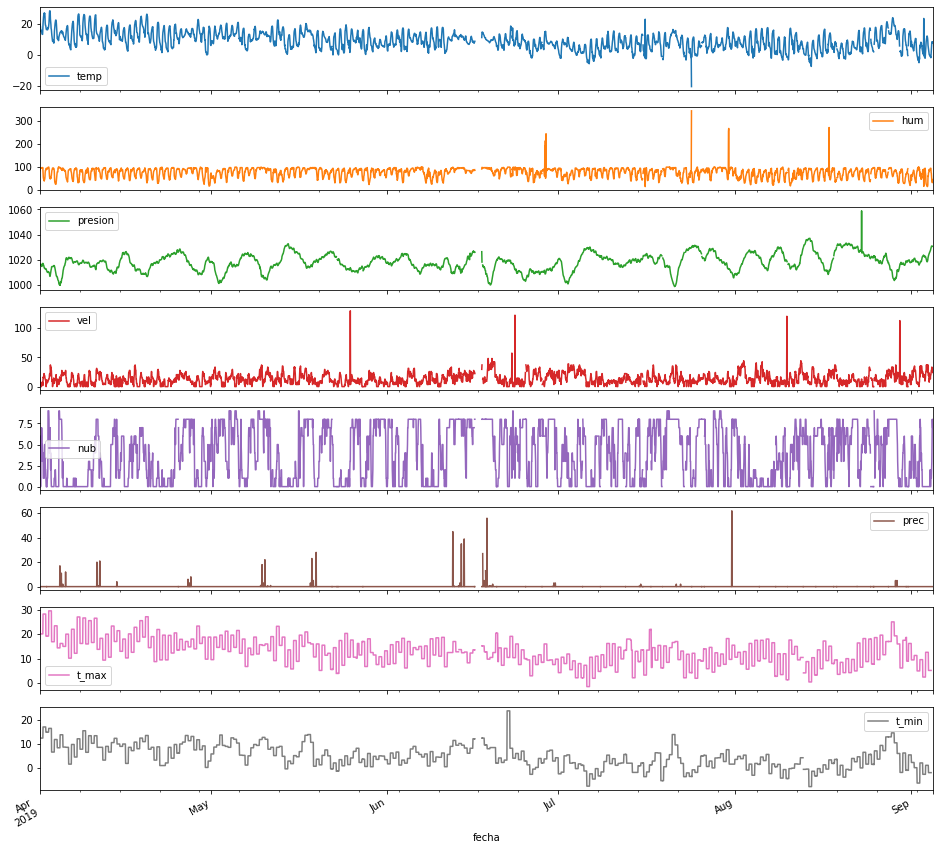

In [10]:
weather.plot(subplots=True, figsize=(16,16));

In [11]:
weather.isna().sum()

temp         77
hum          83
presion      78
dir          73
vel          73
nub          73
prec         73
t_max        80
t_min        80
situacion    73
faltante      0
dtype: int64

In [12]:
weather = weather.interpolate(limit=3)

In [13]:
weather.isna().sum()

temp         22
hum          22
presion      22
dir          73
vel          22
nub          22
prec         22
t_max        26
t_min        26
situacion    73
faltante      0
dtype: int64

In [15]:
spikes_temp = median_outlier_detection(weather.temp, th=4, window=5)

In [32]:
weather.temp[spikes_temp]

fecha
2019-06-10 00:00:00     8.45
2019-06-23 00:00:00    10.25
2019-07-09 17:00:00    14.40
2019-07-16 07:00:00    -1.70
2019-07-24 10:00:00    -1.30
2019-07-24 11:00:00    -1.10
2019-09-03 05:00:00    -0.05
Name: temp, dtype: float64

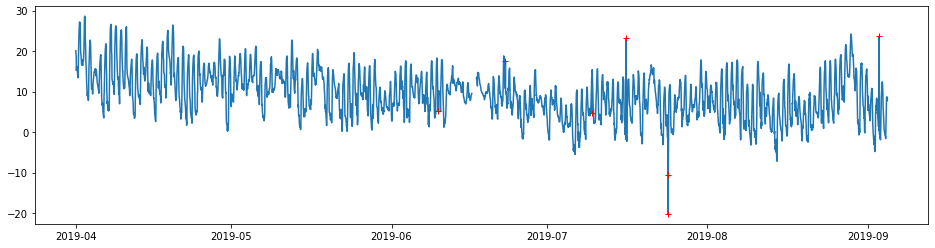

In [16]:
plt.plot(weather.temp)
plt.plot(weather.temp[spikes_temp], 'r+')

In [17]:
spikes_hum = median_outlier_detection(weather.hum, th=20, window=5)

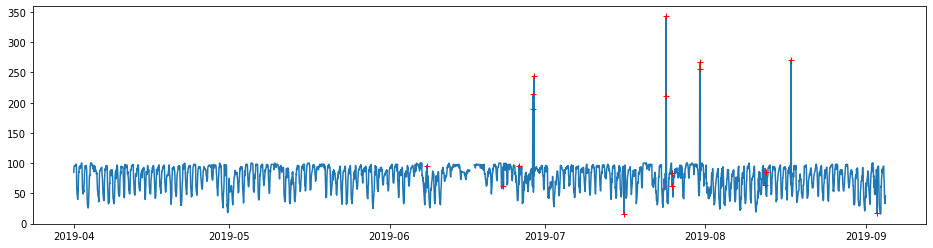

In [18]:
plt.plot(weather.hum)
plt.plot(weather.hum[spikes_hum], 'r+')

In [19]:
spikes_presion = median_outlier_detection(weather.presion, th=2, window=5)

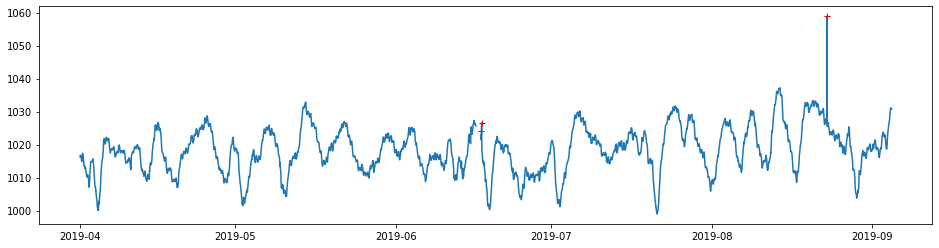

In [21]:
plt.plot(weather.presion)
plt.plot(weather.presion[spikes_presion], "r+")

In [22]:
spikes_vel = median_outlier_detection(weather.vel, th=20, window=5)

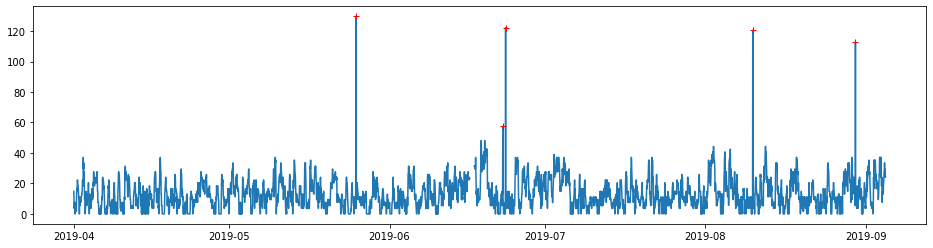

In [23]:
plt.plot(weather.vel)
plt.plot(weather.vel[spikes_vel], 'r+')

In [25]:
weather.loc[spikes_temp, "temp"] = np.nan
weather.loc[spikes_hum, "hum"] = np.nan
weather.loc[spikes_presion, "presion"] = np.nan
weather.loc[spikes_vel, "vel"] = np.nan

In [26]:
weather.temp = weather.temp.interpolate(limit=3)

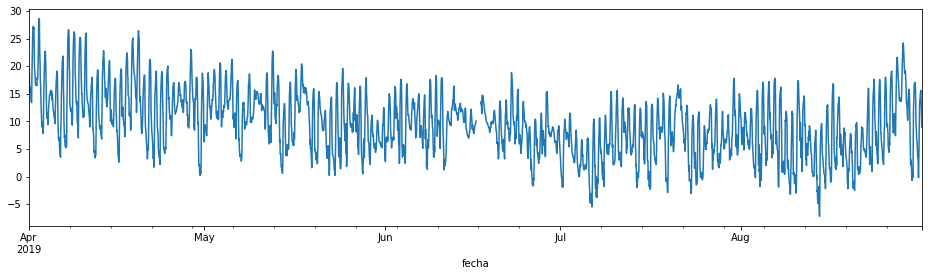

In [103]:
weather.temp.plot()

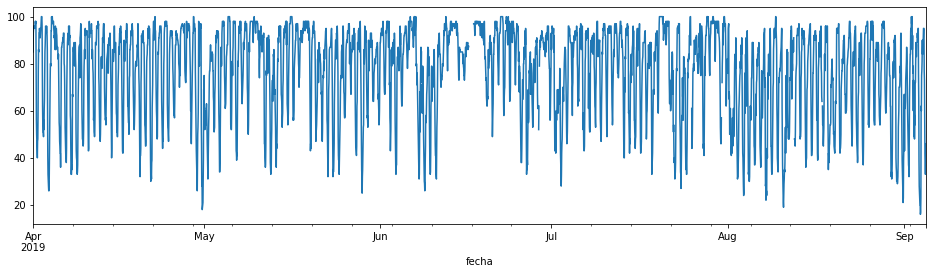

In [27]:
weather.hum.plot()

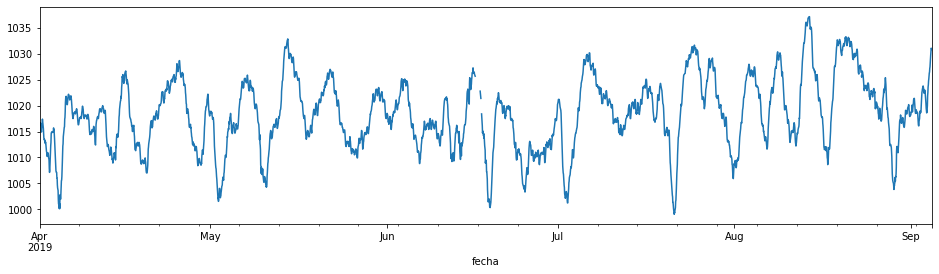

In [28]:
weather.presion.plot()

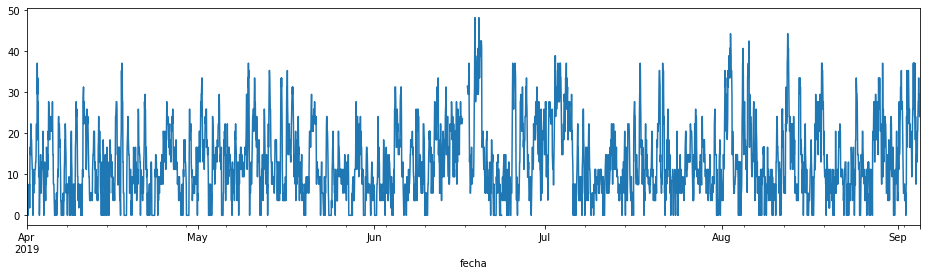

In [29]:
weather.vel.plot()